**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ pandas 0.23.4

# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [1]:
import numpy as np

In [2]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [3]:
adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
adver_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [73]:
X = adver_data[['TV', 'Radio', 'Newspaper']].values
y = adver_data[['Sales']].values
X[:5], X.shape, y[:5], y.shape

(array([[230.1,  37.8,  69.2],
        [ 44.5,  39.3,  45.1],
        [ 17.2,  45.9,  69.3],
        [151.5,  41.3,  58.5],
        [180.8,  10.8,  58.4]]),
 (200, 3),
 array([[22.1],
        [10.4],
        [ 9.3],
        [18.5],
        [12.9]]),
 (200, 1))

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [74]:
means, stds = np.mean(X, axis=0), np.std(X, axis=0)
means, stds

(array([147.0425,  23.264 ,  30.554 ]),
 array([85.63933176, 14.80964564, 21.72410606]))

In [75]:
for i in range(len(X)):
    for j in range(len(X[i])):
        X[i][j] = (X[i][j] - means[j])/stds[j]

X[:5]

array([[ 0.96985227,  0.98152247,  1.77894547],
       [-1.19737623,  1.08280781,  0.66957876],
       [-1.51615499,  1.52846331,  1.78354865],
       [ 0.05204968,  1.21785493,  1.28640506],
       [ 0.3941822 , -0.84161366,  1.28180188]])

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [77]:
x0 = np.ones(len(X)).reshape(200, 1)
x0[0][:5]

array([1.])

In [78]:
X = np.hstack((X, x0))
X[5]

array([-1.61540845,  1.73103399,  2.04592999,  1.        ])

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [39]:
def mserror(y, y_pred):
    return (y.sub(y_pred)**2).sum()/y.shape[0]

In [40]:
# проверка правильности работы функции.на этих данных среднеквардатичная ошибка должна быть равна 4
y_test = pd.Series([1, 2, 3, 4, 5])
y_pred = pd.Series(y_test.values + 2) # [3, 4, 5, 6 ,7]
mserror(y_test, y_pred)

4.0

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'1 задание'.***

In [41]:
y_test = pd.Series(y.reshape((1, 200))[0])
y_pred = pd.Series([y_test.median() for i in range(y_test.size)])
answer1 = mserror(y_test, y_pred)
print(round(answer1, 3))

with open('answer1.txt', 'w') as file1:
    file1.write(str(answer1))

28.346


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [42]:
def normal_equation(X, y):
    return np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y) 

In [43]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[[ 3.91925365]
 [ 2.79206274]
 [-0.02253861]
 [14.0225    ]]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Полученный результат, округленный до 3 знаков после запятой, является ответом на *'2 задание'*.**

In [51]:
x1 = np.array([0, 0, 0, 1])
answer2 = x1.dot(norm_eq_weights)[0]
print(round(answer2, 3))

14.022


In [52]:
with open('answer2.txt', 'w') as file1:
    file1.write(str(answer2))

**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [53]:
def linear_prediction(X, w):
    return X.dot(w)

In [72]:
x1_test = np.array([[0,0,0,1], [1,1,1,1]])
pred = linear_prediction(x1_test, norm_eq_weights)
pred, mserror(pd.Series([14.0225 , 20.71127779]), pd.Series(pred.reshape(1,2)[0]))

(array([[14.0225    ],
        [20.71127779]]),
 3.427294025039542e-19)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат, округленный до 3 знаков после запятой, является ответом на *'3 задание'***

In [81]:
y_test = pd.Series(y.reshape((1, 200))[0])
y_pred = linear_prediction(X, norm_eq_weights)
y_pred = pd.Series(y_pred.reshape(1, 200)[0])
answer3 = mserror(y_test, y_pred)
print(answer3)
print(round(answer3, 3))

2.784126314510936
2.784


In [83]:
with open('answer3.txt', 'w') as file:
    file.write(str(round(answer3, 3)))

**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [110]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    part = w[3] + w[0] * X[train_ind][0] + w[1] * X[train_ind][1] + w[2] * X[train_ind][2] - y[train_ind]
    grad0 = X[train_ind][0]*part / X.shape[0]
    grad1 = X[train_ind][1]*part / X.shape[0]
    grad2 = X[train_ind][2]*part / X.shape[0]
    grad3 = part
    return  w - 2 * eta * np.array([grad0, grad1, grad2, grad3])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [111]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        w = stochastic_gradient_step(X, y, w, random_ind)
        error = mserror(pd.Series(y[0]), pd.Series(linear_prediction(X, w)[0]))
        errors.append(error)
        iter_num += 1
        
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [112]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.array([0, 0, 0, 0]), max_iter=1e5)

Wall time: 1min 16s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

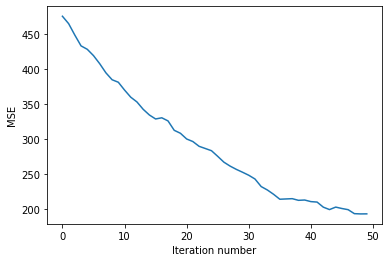

In [113]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

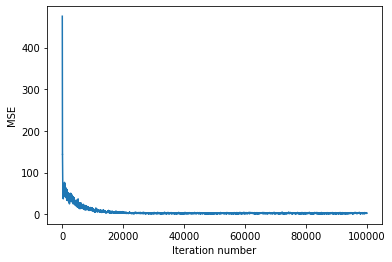

In [114]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [ ]:
stoch_grad_desc_weights

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [ ]:
stoch_errors_by_iter[-1]

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'4 задание'*.**

In [ ]:
stoch_grad_desc_weights = [stoch_grad_desc_weights[i][0] for i in range(stoch_grad_desc_weights.shape[0])]

In [ ]:
stoch_grad_desc_weights

In [ ]:
y_test = pd.Series(y.reshape((1, 200))[0])
y_pred = linear_prediction(X, stoch_grad_desc_weights)
y_pred = pd.Series(y_pred.reshape(1, 200)[0])
answer4 = mserror(y_test, y_pred)
print(answer4)
print(round(answer4, 3))

In [ ]:
with open('answer4.txt', 'w') as file:
    file.write(str(round(answer4, 3)))

array([[ 3.94788216,  3.94788216,  3.94788216,  3.94788216],
       [ 2.76709264,  2.76709264,  2.76709264,  2.76709264],
       [-0.04403781, -0.04403781, -0.04403781, -0.04403781],
       [13.98492454, 13.98492454, 13.98492454, 13.98492454]])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [116]:
stoch_errors_by_iter[-1]

2.7178498264859634

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'4 задание'*.**

In [125]:
stoch_grad_desc_weights = [stoch_grad_desc_weights[i][0] for i in range(stoch_grad_desc_weights.shape[0])]

AttributeError: 'list' object has no attribute 'shape'

In [126]:
stoch_grad_desc_weights

[3.947882156451259,
 2.767092639082782,
 -0.044037805466097396,
 13.984924535480147]

In [127]:
y_test = pd.Series(y.reshape((1, 200))[0])
y_pred = linear_prediction(X, stoch_grad_desc_weights)
y_pred = pd.Series(y_pred.reshape(1, 200)[0])
answer4 = mserror(y_test, y_pred)
print(answer4)
print(round(answer4, 3))

2.7876756417592747
2.788


In [130]:
with open('answer4.txt', 'w') as file:
    file.write(str(round(answer4, 3)))